In [164]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_fontja

file_path_10 = '/Users/ryoma/BLP/yosoku/【10月】生産性結果記入用紙_Ver.4.3 (2_18).xlsx'  # Excelファイルのパスを指定
sheet_name = '実績昼'  # 読み込むシート名を指定

data_10 = pd.read_excel(file_path_10, sheet_name=sheet_name)
data_10.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,作業ライン,項目,2024-10-01 00:00:00,2024-10-02 00:00:00,2024-10-03 00:00:00,2024-10-04 00:00:00,2024-10-05 00:00:00,2024-10-06 00:00:00,2024-10-07 00:00:00,2024-10-08 00:00:00,...,2024-10-23 00:00:00,2024-10-24 00:00:00,2024-10-25 00:00:00,2024-10-26 00:00:00,2024-10-27 00:00:00,2024-10-28 00:00:00,2024-10-29 00:00:00,2024-10-30 00:00:00,2024-10-31 00:00:00,合計
2,NaN,日付,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,NaN
3,A-PaLS,件数,0,1756,2125,2433,1490,0,2455,2921,...,2941,2498,2941,1249,0,2893,2264,297,170,57837
4,NaN,作業時間(分),0,4302,4740,7002,4620,0,5544,7026,...,8190,5871,7326,4485,0,6240,5694,771,486,154956


In [165]:
# Excelデータの読み込み
file_path_11 = '/Users/ryoma/BLP/yosoku/【11月】生産性結果記入用紙_Ver.4.3(2).xlsx'  # Excelファイルのパスを指定
sheet_name = '実績昼'  # 読み込むシート名を指定

data_11 = pd.read_excel(file_path_11, sheet_name=sheet_name)
data_11.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,作業ライン,項目,2024-11-01 00:00:00,2024-11-02 00:00:00,2024-11-03 00:00:00,2024-11-04 00:00:00,2024-11-05 00:00:00,2024-11-06 00:00:00,2024-11-07 00:00:00,2024-11-08 00:00:00,...,2024-11-24 00:00:00,2024-11-25 00:00:00,2024-11-26 00:00:00,2024-11-27 00:00:00,2024-11-28 00:00:00,2024-11-29 00:00:00,2024-11-30 00:00:00,2024-12-01 00:00:00,合計,NaN
2,NaN,日付,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,NaN,NaN
3,A-PaLS,件数,0,2199,0,0,1172,1894,2912,2794,...,1332,2867,3622,3856,2360,1597,1582,0,59330,NaN
4,NaN,作業時間(分),0,5262,0,0,2070,3567,8088,7374,...,4302,9009,7893,9682,8725,7200,4905,0,172247,NaN


In [166]:
file_path_9 = '/Users/ryoma/BLP/yosoku/【9月】生産性結果記入用紙_Ver.4.3.xlsx'  # Excelファイルのパスを指定
sheet_name = '実績昼'  # 読み込むシート名を指定

data_9 = pd.read_excel(file_path_9, sheet_name=sheet_name)
data_9.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,作業ライン,項目,2024-09-01 00:00:00,2024-09-02 00:00:00,2024-09-03 00:00:00,2024-09-04 00:00:00,2024-09-05 00:00:00,2024-09-06 00:00:00,2024-09-07 00:00:00,2024-09-08 00:00:00,...,2024-09-23 00:00:00,2024-09-24 00:00:00,2024-09-25 00:00:00,2024-09-26 00:00:00,2024-09-27 00:00:00,2024-09-28 00:00:00,2024-09-29 00:00:00,2024-09-30 00:00:00,2024-10-01 00:00:00,合計
2,NaN,日付,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,NaN
3,A-PaLS,件数,0,0,1289,1785,1992,2281,1805,0,...,2687,2538,3351,3871,2908,1343,0,863,0,54997
4,NaN,作業時間(分),0,0,3285,3420,6699,6978,5190,0,...,6945,5811,8265,7998,8130,2952,0,2169,0,156935


In [167]:
file_path_12 = '/Users/ryoma/BLP/yosoku/【12月】生産性結果記入用紙_Ver.4.4.xlsx'  # Excelファイルのパスを指定
sheet_name = '実績昼'  # 読み込むシート名を指定

data_12 = pd.read_excel(file_path_12, sheet_name=sheet_name)
data_12.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,作業ライン,項目,2024-12-01 00:00:00,2024-12-02 00:00:00,2024-12-03 00:00:00,2024-12-04 00:00:00,2024-12-05 00:00:00,2024-12-06 00:00:00,2024-12-07 00:00:00,2024-12-08 00:00:00,...,2024-12-23 00:00:00,2024-12-24 00:00:00,2024-12-25 00:00:00,2024-12-26 00:00:00,2024-12-27 00:00:00,2024-12-28 00:00:00,2024-12-29 00:00:00,2024-12-30 00:00:00,2024-12-31 00:00:00,合計
2,NaN,日付,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,NaN
3,A-PaLS,件数,0,0,1304,1905,2948,2008,2435,0,...,2509,3039,2603,1991,2509,1275,0,0,0,52980
4,NaN,作業時間(分),0,0,2475,4917,7047,6663,5514,0,...,7068,7008,6417,7008,6795,3810,0,0,0,151783


In [168]:
# 行列を逆にする
data_10 = data_10.T
# 1行目を列名にする
data_10.columns = data_10.iloc[1]
# 0,1行目を削除
data_10 = data_10.drop(data_10.index[[0, 1]])
data_10.head()

Unnamed: 1,NaN,項目,日付,件数,作業時間(分),目標件数,NaN,作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,予測,買い合わせ平均,テイケイ,NaN,項目,生産性(分/件),1日作業量/L
Unnamed: 2,NaN,2024-10-01 00:00:00,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1,0,0
Unnamed: 3,NaN,2024-10-02 00:00:00,2,1756,4302,NaN,NaN,7,5,12,4,358.5,439,NaN,NaN,0,NaN,2,2.449886,177.559275
Unnamed: 4,NaN,2024-10-03 00:00:00,3,2125,4740,NaN,NaN,6,6,12,4,395,531.25,NaN,NaN,0,NaN,3,2.230588,195.015823
Unnamed: 5,NaN,2024-10-04 00:00:00,4,2433,7002,NaN,NaN,12,6,18,6,389,405.5,NaN,NaN,0,NaN,4,2.877928,151.150386
Unnamed: 6,NaN,2024-10-05 00:00:00,5,1490,4620,NaN,NaN,13,2,15,5,308,298,NaN,NaN,0,NaN,5,3.100671,140.292208


In [169]:
# 行列を逆にする
data_11 = data_11.T
# 1行目を列名にする
data_11.columns = data_11.iloc[1]
# 0,1行目を削除
data_11 = data_11.drop(data_11.index[[0, 1]])
data_11.head()

Unnamed: 1,NaN,項目,日付,件数,作業時間(分),目標件数,作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,予測,買い合わせ,テイケイ,項目,生産性(分/件),1日作業量/L
Unnamed: 2,NaN,2024-11-01 00:00:00,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0
Unnamed: 3,NaN,2024-11-02 00:00:00,2,2199,5262,NaN,13,5,18,6,292.333333,366.5,NaN,NaN,0,2,2.392906,181.787343
Unnamed: 4,NaN,2024-11-03 00:00:00,3,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,0,0
Unnamed: 5,NaN,2024-11-04 00:00:00,4,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4,0,0
Unnamed: 6,NaN,2024-11-05 00:00:00,5,1172,2070,NaN,NaN,6,6,2,345,586,NaN,NaN,0,5,1.766212,246.289855


In [170]:
# 行列を逆にする
data_9 = data_9.T
# 1行目を列名にする
data_9.columns = data_9.iloc[1]
# 0,1行目を削除
data_9 = data_9.drop(data_9.index[[0, 1]])
data_9.head()

Unnamed: 1,NaN,項目,日付,件数,作業時間(分),作業人数,リーダー人数,テイケイ,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,1日あたりの作業件数,予測,買い合わせ平均,NaN,項目,生産性(分/件),1日作業量/L
Unnamed: 2,NaN,2024-09-01 00:00:00,1,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
Unnamed: 3,NaN,2024-09-02 00:00:00,2,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,0
Unnamed: 4,NaN,2024-09-03 00:00:00,3,1289,3285,6,3,0,9,3,365,429.666667,NaN,NaN,NaN,NaN,3,2.548487,170.689498
Unnamed: 5,NaN,2024-09-04 00:00:00,4,1785,3420,6,3,0,9,3,380,595,NaN,NaN,NaN,NaN,4,1.915966,227.039474
Unnamed: 6,NaN,2024-09-05 00:00:00,5,1992,6699,14,4,0,18,6,372.166667,332,NaN,NaN,NaN,NaN,5,3.362952,129.350649


In [171]:
# 行列を逆にする
data_12 = data_12.T
# 1行目を列名にする
data_12.columns = data_12.iloc[1]
# 0,1行目を削除
data_12 = data_12.drop(data_12.index[[0, 1]])
data_12.head()

Unnamed: 1,NaN,項目,日付,件数,作業時間(分),作業人数,リーダー人数,テイケイ,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,1日あたりの作業件数,予測,買い合わせ平均,NaN,項目,生産性(分/件),1日作業量/L
Unnamed: 2,NaN,2024-12-01 00:00:00,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
Unnamed: 3,NaN,2024-12-02 00:00:00,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,0
Unnamed: 4,NaN,2024-12-03 00:00:00,3,1304,2475,8,4,NaN,12,4,206.25,326,NaN,NaN,NaN,NaN,3,1.898006,229.187879
Unnamed: 5,NaN,2024-12-04 00:00:00,4,1905,4917,13,5,NaN,18,6,273.166667,317.5,NaN,NaN,NaN,NaN,4,2.581102,168.532642
Unnamed: 6,NaN,2024-12-05 00:00:00,5,2948,7047,13,5,3,21,7,335.571429,421.142857,NaN,NaN,NaN,NaN,5,2.390434,181.975309


In [172]:
# 欠損値を探す
data_10.isnull().sum()

Unnamed: 1
NaN            32
項目              0
日付              1
件数              0
作業時間(分)         0
目標件数           32
NaN            32
作業人数            4
リーダー人数          4
合計作業人数          2
作業ライン           5
1人あたりの作業時間      5
1本あたりの平均作業数     5
予測             32
買い合わせ平均        32
テイケイ            0
NaN            32
項目              0
生産性(分/件)        0
1日作業量/L         0
dtype: int64

In [173]:
# 欠損値を探す
data_11.isnull().sum()

Unnamed: 1
NaN            33
項目              1
日付              2
件数              1
作業時間(分)         1
目標件数           33
作業人数            8
リーダー人数          7
合計作業人数          8
作業ライン           8
1人あたりの作業時間      8
1本あたりの平均作業数     8
予測             33
買い合わせ          33
テイケイ            1
項目              0
生産性(分/件)        0
1日作業量/L         0
dtype: int64

In [174]:
# 欠損値を探す
data_9.isnull().sum()

Unnamed: 1
NaN            32
項目              0
日付              1
件数              0
作業時間(分)         0
作業人数            7
リーダー人数          7
テイケイ            2
合計作業人数          4
作業ライン           8
1人あたりの作業時間      8
1本あたりの平均作業数     8
1日あたりの作業件数     32
予測             32
買い合わせ平均        32
NaN            32
項目              0
生産性(分/件)        0
1日作業量/L         0
dtype: int64

In [175]:
# 欠損値を探す
data_12.isnull().sum()

Unnamed: 1
NaN            32
項目              0
日付              1
件数              0
作業時間(分)         0
作業人数            8
リーダー人数          8
テイケイ           11
合計作業人数          3
作業ライン           8
1人あたりの作業時間      8
1本あたりの平均作業数    11
1日あたりの作業件数     32
予測             32
買い合わせ平均        32
NaN            32
項目              0
生産性(分/件)        0
1日作業量/L         0
dtype: int64

In [176]:
data_10 = data_10.drop(data_10.columns[[0, 1, 5, 13, 14]], axis=1)
data_10.head()

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,テイケイ,生産性(分/件),1日作業量/L
Unnamed: 2,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
Unnamed: 3,2,1756,4302,7,5,12,4,358.5,439,0,2.449886,177.559275
Unnamed: 4,3,2125,4740,6,6,12,4,395,531.25,0,2.230588,195.015823
Unnamed: 5,4,2433,7002,12,6,18,6,389,405.5,0,2.877928,151.150386
Unnamed: 6,5,1490,4620,13,2,15,5,308,298,0,3.100671,140.292208


In [177]:
data_11 = data_11.drop(data_11.columns[[0, 1, 5, 12, 13]], axis=1)
data_11.head()

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,テイケイ,生産性(分/件),1日作業量/L
Unnamed: 2,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
Unnamed: 3,2,2199,5262,13,5,18,6,292.333333,366.5,0,2.392906,181.787343
Unnamed: 4,3,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
Unnamed: 5,4,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
Unnamed: 6,5,1172,2070,NaN,6,6,2,345,586,0,1.766212,246.289855


In [178]:
data_9 = data_9.drop(data_9.columns[[0, 1, 12, 13, 14, 15]], axis=1)
data_9.head()

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,テイケイ,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,生産性(分/件),1日作業量/L
Unnamed: 2,1,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0
Unnamed: 3,2,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0
Unnamed: 4,3,1289,3285,6,3,0,9,3,365,429.666667,2.548487,170.689498
Unnamed: 5,4,1785,3420,6,3,0,9,3,380,595,1.915966,227.039474
Unnamed: 6,5,1992,6699,14,4,0,18,6,372.166667,332,3.362952,129.350649


In [179]:
data_12 = data_12.drop(data_12.columns[[0, 1, 12, 13, 14, 15]], axis=1)
data_12.head()

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,テイケイ,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,生産性(分/件),1日作業量/L
Unnamed: 2,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
Unnamed: 3,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
Unnamed: 4,3,1304,2475,8,4,NaN,12,4,206.25,326,1.898006,229.187879
Unnamed: 5,4,1905,4917,13,5,NaN,18,6,273.166667,317.5,2.581102,168.532642
Unnamed: 6,5,2948,7047,13,5,3,21,7,335.571429,421.142857,2.390434,181.975309


In [180]:
# NaNを全て0に変換
data_10 = data_10.fillna(0)
data_10.head()

/var/folders/zn/w212lcms0dxb2bg4lyzl6pxm0000gn/T/ipykernel_77416/2710974917.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_10 = data_10.fillna(0)


Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,テイケイ,生産性(分/件),1日作業量/L
Unnamed: 2,1,0,0,0,0,0,0,0.0,0.00,0,0.000000,0.000000
Unnamed: 3,2,1756,4302,7,5,12,4,358.5,439.00,0,2.449886,177.559275
Unnamed: 4,3,2125,4740,6,6,12,4,395.0,531.25,0,2.230588,195.015823
Unnamed: 5,4,2433,7002,12,6,18,6,389.0,405.50,0,2.877928,151.150386
Unnamed: 6,5,1490,4620,13,2,15,5,308.0,298.00,0,3.100671,140.292208


In [181]:
# NaNを全て0に変換
data_11 = data_11.fillna(0)
data_11.head()

/var/folders/zn/w212lcms0dxb2bg4lyzl6pxm0000gn/T/ipykernel_77416/3095783728.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_11 = data_11.fillna(0)


Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,テイケイ,生産性(分/件),1日作業量/L
Unnamed: 2,1,0,0,0,0,0,0,0.000000,0.0,0,0.000000,0.000000
Unnamed: 3,2,2199,5262,13,5,18,6,292.333333,366.5,0,2.392906,181.787343
Unnamed: 4,3,0,0,0,0,0,0,0.000000,0.0,0,0.000000,0.000000
Unnamed: 5,4,0,0,0,0,0,0,0.000000,0.0,0,0.000000,0.000000
Unnamed: 6,5,1172,2070,0,6,6,2,345.000000,586.0,0,1.766212,246.289855


In [182]:
# NaNを全て0に変換
data_9 = data_9.fillna(0)
data_9.head()

/var/folders/zn/w212lcms0dxb2bg4lyzl6pxm0000gn/T/ipykernel_77416/2000210121.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_9 = data_9.fillna(0)


Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,テイケイ,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,生産性(分/件),1日作業量/L
Unnamed: 2,1,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
Unnamed: 3,2,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
Unnamed: 4,3,1289,3285,6,3,0,9,3,365.000000,429.666667,2.548487,170.689498
Unnamed: 5,4,1785,3420,6,3,0,9,3,380.000000,595.000000,1.915966,227.039474
Unnamed: 6,5,1992,6699,14,4,0,18,6,372.166667,332.000000,3.362952,129.350649


In [183]:
# NaNを全て0に変換
data_12 = data_12.fillna(0)
data_12.head()

/var/folders/zn/w212lcms0dxb2bg4lyzl6pxm0000gn/T/ipykernel_77416/1371613324.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_12 = data_12.fillna(0)


Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,テイケイ,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,生産性(分/件),1日作業量/L
Unnamed: 2,1,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
Unnamed: 3,2,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
Unnamed: 4,3,1304,2475,8,4,0,12,4,206.250000,326.000000,1.898006,229.187879
Unnamed: 5,4,1905,4917,13,5,0,18,6,273.166667,317.500000,2.581102,168.532642
Unnamed: 6,5,2948,7047,13,5,3,21,7,335.571429,421.142857,2.390434,181.975309


In [184]:
# 0列目のデータを表示
data_10.iloc[:, 0]
data_10

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,テイケイ,生産性(分/件),1日作業量/L
Unnamed: 2,1,0,0,0,0,0,0,0.000000,0.000000,0,0.000000,0.000000
Unnamed: 3,2,1756,4302,7,5,12,4,358.500000,439.000000,0,2.449886,177.559275
Unnamed: 4,3,2125,4740,6,6,12,4,395.000000,531.250000,0,2.230588,195.015823
Unnamed: 5,4,2433,7002,12,6,18,6,389.000000,405.500000,0,2.877928,151.150386
Unnamed: 6,5,1490,4620,13,2,15,5,308.000000,298.000000,0,3.100671,140.292208
Unnamed: 7,6,0,0,11,4,15,5,0.000000,0.000000,0,0.000000,0.000000
Unnamed: 8,7,2455,5544,11,4,15,5,369.600000,491.000000,0,2.258248,192.627165
Unnamed: 9,8,2921,7026,18,3,21,7,334.571429,417.285714,0,2.405341,180.847566
Unnamed: 10,9,2138,7905,17,4,21,7,376.428571,305.428571,0,3.697381,117.650854
Unnamed: 11,10,1921,7332,17,4,21,7,349.142857,274.428571,0,3.816762,113.970949


In [185]:
# 0列目のデータを表示
data_11.iloc[:, 0]
data_11

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,テイケイ,生産性(分/件),1日作業量/L
Unnamed: 2,1,0,0,0,0,0,0,0.000000,0.000000,0,0.000000,0.000000
Unnamed: 3,2,2199,5262,13,5,18,6,292.333333,366.500000,0,2.392906,181.787343
Unnamed: 4,3,0,0,0,0,0,0,0.000000,0.000000,0,0.000000,0.000000
Unnamed: 5,4,0,0,0,0,0,0,0.000000,0.000000,0,0.000000,0.000000
Unnamed: 6,5,1172,2070,0,6,6,2,345.000000,586.000000,0,1.766212,246.289855
Unnamed: 7,6,1894,3567,5,4,9,3,396.333333,631.333333,0,1.883316,230.975610
Unnamed: 8,7,2912,8088,17,4,21,7,385.142857,416.000000,0,2.777473,156.617211
Unnamed: 9,8,2794,7374,17,4,21,7,351.142857,399.142857,0,2.639227,164.820993
Unnamed: 10,9,3176,8283,13,2,15,5,552.200000,635.200000,0,2.607997,166.794640
Unnamed: 11,10,0,0,0,0,0,0,0.000000,0.000000,0,0.000000,0.000000


In [186]:
# 0列目のデータを表示
data_9.iloc[:, 0]
data_9

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,テイケイ,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,生産性(分/件),1日作業量/L
Unnamed: 2,1,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
Unnamed: 3,2,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
Unnamed: 4,3,1289,3285,6,3,0,9,3,365.000000,429.666667,2.548487,170.689498
Unnamed: 5,4,1785,3420,6,3,0,9,3,380.000000,595.000000,1.915966,227.039474
Unnamed: 6,5,1992,6699,14,4,0,18,6,372.166667,332.000000,3.362952,129.350649
Unnamed: 7,6,2281,6978,17,4,0,21,7,332.285714,325.857143,3.059185,142.194755
Unnamed: 8,7,1805,5190,13,2,0,15,5,346.000000,361.000000,2.875346,151.286127
Unnamed: 9,8,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
Unnamed: 10,9,2122,6753,17,4,0,21,7,321.571429,303.142857,3.182375,136.690360
Unnamed: 11,10,2813,8346,17,4,0,21,7,397.428571,401.857143,2.966939,146.615744


In [187]:
# 0列目のデータを表示
data_12.iloc[:, 0]
data_12

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,テイケイ,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,生産性(分/件),1日作業量/L
Unnamed: 2,1,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
Unnamed: 3,2,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
Unnamed: 4,3,1304,2475,8,4,0,12,4,206.250000,326.000000,1.898006,229.187879
Unnamed: 5,4,1905,4917,13,5,0,18,6,273.166667,317.500000,2.581102,168.532642
Unnamed: 6,5,2948,7047,13,5,3,21,7,335.571429,421.142857,2.390434,181.975309
Unnamed: 7,6,2008,6663,13,4,4,21,7,317.285714,286.857143,3.318227,131.094102
Unnamed: 8,7,2435,5514,13,2,0,15,5,367.600000,487.000000,2.264476,192.097388
Unnamed: 9,8,0,0,14,4,3,21,7,0.000000,0.000000,0.000000,0.000000
Unnamed: 10,9,3419,7497,13,4,4,21,7,357.000000,488.428571,2.192746,198.381353
Unnamed: 11,10,2992,7869,13,4,4,21,7,374.714286,427.428571,2.630013,165.398399


In [188]:
# Unnamed: 33と34を削除
data_10 = data_10.drop(data_10.index[[31]])
data_10


Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,テイケイ,生産性(分/件),1日作業量/L
Unnamed: 2,1,0,0,0,0,0,0,0.000000,0.000000,0,0.000000,0.000000
Unnamed: 3,2,1756,4302,7,5,12,4,358.500000,439.000000,0,2.449886,177.559275
Unnamed: 4,3,2125,4740,6,6,12,4,395.000000,531.250000,0,2.230588,195.015823
Unnamed: 5,4,2433,7002,12,6,18,6,389.000000,405.500000,0,2.877928,151.150386
Unnamed: 6,5,1490,4620,13,2,15,5,308.000000,298.000000,0,3.100671,140.292208
Unnamed: 7,6,0,0,11,4,15,5,0.000000,0.000000,0,0.000000,0.000000
Unnamed: 8,7,2455,5544,11,4,15,5,369.600000,491.000000,0,2.258248,192.627165
Unnamed: 9,8,2921,7026,18,3,21,7,334.571429,417.285714,0,2.405341,180.847566
Unnamed: 10,9,2138,7905,17,4,21,7,376.428571,305.428571,0,3.697381,117.650854
Unnamed: 11,10,1921,7332,17,4,21,7,349.142857,274.428571,0,3.816762,113.970949


In [189]:
# Unnamed: 33と34を削除
data_11 = data_11.drop(data_11.index[[31, 32]])
data_11

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,テイケイ,生産性(分/件),1日作業量/L
Unnamed: 2,1,0,0,0,0,0,0,0.000000,0.000000,0,0.000000,0.000000
Unnamed: 3,2,2199,5262,13,5,18,6,292.333333,366.500000,0,2.392906,181.787343
Unnamed: 4,3,0,0,0,0,0,0,0.000000,0.000000,0,0.000000,0.000000
Unnamed: 5,4,0,0,0,0,0,0,0.000000,0.000000,0,0.000000,0.000000
Unnamed: 6,5,1172,2070,0,6,6,2,345.000000,586.000000,0,1.766212,246.289855
Unnamed: 7,6,1894,3567,5,4,9,3,396.333333,631.333333,0,1.883316,230.975610
Unnamed: 8,7,2912,8088,17,4,21,7,385.142857,416.000000,0,2.777473,156.617211
Unnamed: 9,8,2794,7374,17,4,21,7,351.142857,399.142857,0,2.639227,164.820993
Unnamed: 10,9,3176,8283,13,2,15,5,552.200000,635.200000,0,2.607997,166.794640
Unnamed: 11,10,0,0,0,0,0,0,0.000000,0.000000,0,0.000000,0.000000


In [190]:
# Unnamed: 33と34を削除
data_9 = data_9.drop(data_9.index[[31]])
data_9

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,テイケイ,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,生産性(分/件),1日作業量/L
Unnamed: 2,1,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
Unnamed: 3,2,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
Unnamed: 4,3,1289,3285,6,3,0,9,3,365.000000,429.666667,2.548487,170.689498
Unnamed: 5,4,1785,3420,6,3,0,9,3,380.000000,595.000000,1.915966,227.039474
Unnamed: 6,5,1992,6699,14,4,0,18,6,372.166667,332.000000,3.362952,129.350649
Unnamed: 7,6,2281,6978,17,4,0,21,7,332.285714,325.857143,3.059185,142.194755
Unnamed: 8,7,1805,5190,13,2,0,15,5,346.000000,361.000000,2.875346,151.286127
Unnamed: 9,8,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
Unnamed: 10,9,2122,6753,17,4,0,21,7,321.571429,303.142857,3.182375,136.690360
Unnamed: 11,10,2813,8346,17,4,0,21,7,397.428571,401.857143,2.966939,146.615744


In [191]:
# Unnamed: 33と34を削除
data_12 = data_12.drop(data_12.index[[31]])
data_12

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,テイケイ,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,生産性(分/件),1日作業量/L
Unnamed: 2,1,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
Unnamed: 3,2,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
Unnamed: 4,3,1304,2475,8,4,0,12,4,206.250000,326.000000,1.898006,229.187879
Unnamed: 5,4,1905,4917,13,5,0,18,6,273.166667,317.500000,2.581102,168.532642
Unnamed: 6,5,2948,7047,13,5,3,21,7,335.571429,421.142857,2.390434,181.975309
Unnamed: 7,6,2008,6663,13,4,4,21,7,317.285714,286.857143,3.318227,131.094102
Unnamed: 8,7,2435,5514,13,2,0,15,5,367.600000,487.000000,2.264476,192.097388
Unnamed: 9,8,0,0,14,4,3,21,7,0.000000,0.000000,0.000000,0.000000
Unnamed: 10,9,3419,7497,13,4,4,21,7,357.000000,488.428571,2.192746,198.381353
Unnamed: 11,10,2992,7869,13,4,4,21,7,374.714286,427.428571,2.630013,165.398399


In [192]:
# 「件数」数が0の行を削除
data_10 = data_10[data_10['件数'] != 0]
data_10

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,テイケイ,生産性(分/件),1日作業量/L
Unnamed: 3,2,1756,4302,7,5,12,4,358.500000,439.000000,0,2.449886,177.559275
Unnamed: 4,3,2125,4740,6,6,12,4,395.000000,531.250000,0,2.230588,195.015823
Unnamed: 5,4,2433,7002,12,6,18,6,389.000000,405.500000,0,2.877928,151.150386
Unnamed: 6,5,1490,4620,13,2,15,5,308.000000,298.000000,0,3.100671,140.292208
Unnamed: 8,7,2455,5544,11,4,15,5,369.600000,491.000000,0,2.258248,192.627165
Unnamed: 9,8,2921,7026,18,3,21,7,334.571429,417.285714,0,2.405341,180.847566
Unnamed: 10,9,2138,7905,17,4,21,7,376.428571,305.428571,0,3.697381,117.650854
Unnamed: 11,10,1921,7332,17,4,21,7,349.142857,274.428571,0,3.816762,113.970949
Unnamed: 12,11,2197,7491,17,4,21,7,356.714286,313.857143,0,3.409650,127.579095
Unnamed: 13,12,1978,5634,16,2,18,6,313.000000,329.666667,0,2.848332,152.720980


In [193]:
# 「件数」数が0の行を削除
data_11 = data_11[data_11['件数'] != 0]
data_11

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,テイケイ,生産性(分/件),1日作業量/L
Unnamed: 3,2,2199,5262,13,5,18,6,292.333333,366.500000,0,2.392906,181.787343
Unnamed: 6,5,1172,2070,0,6,6,2,345.000000,586.000000,0,1.766212,246.289855
Unnamed: 7,6,1894,3567,5,4,9,3,396.333333,631.333333,0,1.883316,230.975610
Unnamed: 8,7,2912,8088,17,4,21,7,385.142857,416.000000,0,2.777473,156.617211
Unnamed: 9,8,2794,7374,17,4,21,7,351.142857,399.142857,0,2.639227,164.820993
Unnamed: 10,9,3176,8283,13,2,15,5,552.200000,635.200000,0,2.607997,166.794640
Unnamed: 12,11,2679,7782,17,4,21,7,370.571429,382.714286,0,2.904815,149.751349
Unnamed: 13,12,2573,7017,18,3,21,7,334.142857,367.571429,0,2.727167,159.506199
Unnamed: 14,13,1739,6612,18,3,21,7,314.857143,248.428571,0,3.802185,114.407895
Unnamed: 15,14,2405,6405,17,4,21,7,305.000000,343.571429,0,2.663202,163.337237


In [194]:
# 「件数」数が0の行を削除
data_9 = data_9[data_9['件数'] != 0]
data_9

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,テイケイ,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,生産性(分/件),1日作業量/L
Unnamed: 4,3,1289,3285,6,3,0,9,3,365.000000,429.666667,2.548487,170.689498
Unnamed: 5,4,1785,3420,6,3,0,9,3,380.000000,595.000000,1.915966,227.039474
Unnamed: 6,5,1992,6699,14,4,0,18,6,372.166667,332.000000,3.362952,129.350649
Unnamed: 7,6,2281,6978,17,4,0,21,7,332.285714,325.857143,3.059185,142.194755
Unnamed: 8,7,1805,5190,13,2,0,15,5,346.000000,361.000000,2.875346,151.286127
Unnamed: 10,9,2122,6753,17,4,0,21,7,321.571429,303.142857,3.182375,136.690360
Unnamed: 11,10,2813,8346,17,4,0,21,7,397.428571,401.857143,2.966939,146.615744
Unnamed: 12,11,2251,8009,17,4,0,21,7,381.380952,321.571429,3.557974,122.260582
Unnamed: 13,12,2991,8109,17,4,0,21,7,386.142857,427.285714,2.711133,160.449501
Unnamed: 14,13,2793,7836,17,4,0,21,7,373.142857,399.000000,2.805585,155.047856


In [195]:
# 「件数」数が0の行を削除
data_12 = data_12[data_12['件数'] != 0]
data_12

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,テイケイ,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,生産性(分/件),1日作業量/L
Unnamed: 4,3,1304,2475,8,4,0,12,4,206.250000,326.000000,1.898006,229.187879
Unnamed: 5,4,1905,4917,13,5,0,18,6,273.166667,317.500000,2.581102,168.532642
Unnamed: 6,5,2948,7047,13,5,3,21,7,335.571429,421.142857,2.390434,181.975309
Unnamed: 7,6,2008,6663,13,4,4,21,7,317.285714,286.857143,3.318227,131.094102
Unnamed: 8,7,2435,5514,13,2,0,15,5,367.600000,487.000000,2.264476,192.097388
Unnamed: 10,9,3419,7497,13,4,4,21,7,357.000000,488.428571,2.192746,198.381353
Unnamed: 11,10,2992,7869,13,4,4,21,7,374.714286,427.428571,2.630013,165.398399
Unnamed: 12,11,1886,7983,14,3,4,21,7,380.142857,269.428571,4.232768,102.769635
Unnamed: 13,12,2307,7574,14,4,3,21,7,360.666667,329.571429,3.283052,132.498680
Unnamed: 14,13,2118,7395,14,4,3,21,7,352.142857,0.000000,3.491501,124.588235


In [196]:
# データの標準偏差及び平均を取得（正規化解除に使用）
original_mean_10 = data_10.mean()
original_std_10 = data_10.std()
print(original_mean_10)
print(original_std_10)

Unnamed: 1
日付               16.500000
件数             2224.500000
作業時間(分)        5959.846154
作業人数             14.346154
リーダー人数            3.423077
合計作業人数           17.769231
作業ライン             5.923077
1人あたりの作業時間      324.635165
1本あたりの平均作業数     364.729762
テイケイ              0.000000
生産性(分/件)          2.742364
1日作業量/L         163.063399
dtype: float64
Unnamed: 1
日付                8.949860
件数              789.490633
作業時間(分)        1963.673979
作業人数              4.372114
リーダー人数            1.270372
合計作業人数            4.641618
作業ライン             1.547206
1人あたりの作業時間       75.081417
1本あたりの平均作業数     102.975779
テイケイ              0.000000
生産性(分/件)          0.482453
1日作業量/L          26.670397
dtype: float64


In [197]:
# データの標準偏差及び平均を取得（正規化解除に使用）
original_mean_11 = data_11.mean()
original_std_11 = data_11.std()
print(original_mean_11)
print(original_std_11)

Unnamed: 1
日付               17.200000
件数             2373.200000
作業時間(分)        6889.880000
作業人数             15.040000
リーダー人数            3.920000
合計作業人数           18.960000
作業ライン             6.320000
1人あたりの作業時間      364.869905
1本あたりの平均作業数     388.880190
テイケイ              0.000000
生産性(分/件)          2.967516
1日作業量/L         153.970934
dtype: float64
Unnamed: 1
日付                8.276473
件数              675.897058
作業時間(分)        1746.216704
作業人数              5.223983
リーダー人数            2.100000
合計作業人数            4.217819
作業ライン             1.405940
1人あたりの作業時間       56.735581
1本あたりの平均作業数     114.433354
テイケイ              0.000000
生産性(分/件)          0.667064
1日作業量/L          35.874718
dtype: float64


In [198]:
# データの標準偏差及び平均を取得（正規化解除に使用）
original_mean_9 = data_9.mean()
original_std_9 = data_9.std()
print(original_mean_9)
print(original_std_9)

Unnamed: 1
日付               16.166667
件数             2291.541667
作業時間(分)        6538.958333
作業人数             15.250000
リーダー人数            3.125000
テイケイ              0.000000
合計作業人数           18.375000
作業ライン             6.125000
1人あたりの作業時間      353.801587
1本あたりの平均作業数     381.133929
生産性(分/件)          2.888688
1日作業量/L         156.239116
dtype: float64
Unnamed: 1
日付                8.244454
件数              698.728160
作業時間(分)        1875.513483
作業人数              4.002716
リーダー人数            0.899879
テイケイ              0.000000
合計作業人数            4.537884
作業ライン             1.512628
1人あたりの作業時間       46.951341
1本あたりの平均作業数      96.050779
生産性(分/件)          0.574869
1日作業量/L          30.558039
dtype: float64


In [199]:
# データの標準偏差及び平均を取得（正規化解除に使用）
original_mean_12 = data_12.mean()
original_std_12 = data_12.std()
print(original_mean_12)
print(original_std_12)

Unnamed: 1
日付               15.565217
件数             2303.478261
作業時間(分)        6599.260870
作業人数             14.521739
リーダー人数            3.173913
テイケイ              2.391304
合計作業人数           20.086957
作業ライン             6.695652
1人あたりの作業時間      326.301967
1本あたりの平均作業数     300.417184
生産性(分/件)          2.915700
1日作業量/L         155.130830
dtype: float64
Unnamed: 1
日付                7.873004
件数              522.434674
作業時間(分)        1346.534819
作業人数              2.086092
リーダー人数            1.072473
テイケイ              1.405804
合計作業人数            2.294520
作業ライン             0.764840
1人あたりの作業時間       49.337949
1本あたりの平均作業数     138.918670
生産性(分/件)          0.592831
1日作業量/L          31.325177
dtype: float64


In [200]:
# データの結合
data_9_10_12 = pd.concat([data_9, data_10, data_12])

In [201]:
print(data_9_10_12)

Unnamed: 1   日付    件数  作業時間(分)  作業人数  リーダー人数  テイケイ  合計作業人数  作業ライン  1人あたりの作業時間  \
Unnamed: 4    3  1289     3285     6       3     0       9      3  365.000000   
Unnamed: 5    4  1785     3420     6       3     0       9      3  380.000000   
Unnamed: 6    5  1992     6699    14       4     0      18      6  372.166667   
Unnamed: 7    6  2281     6978    17       4     0      21      7  332.285714   
Unnamed: 8    7  1805     5190    13       2     0      15      5  346.000000   
...          ..   ...      ...   ...     ...   ...     ...    ...         ...   
Unnamed: 25  24  3039     7008    16       3     2      21      7  333.714286   
Unnamed: 26  25  2603     6417    16       3     2      21      7  305.571429   
Unnamed: 27  26  1991     7008    15       3     3      21      7  333.714286   
Unnamed: 28  27  2509     6795    15       3     3      21      7  323.571429   
Unnamed: 29  28  1275     3810    18       3     0      21      7  181.428571   

Unnamed: 1   1本あたりの平均作業数  生

In [202]:
# 対数変換
data_9_10_12 = data_9_10_12.apply(lambda x: np.log(x + 1))
data_11 = data_11.apply(lambda x: np.log(x + 1))

In [203]:
data_9_10_12

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,テイケイ,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,生産性(分/件),1日作業量/L
Unnamed: 4,1.386294,7.162397,8.097426,1.945910,1.386294,0.000000,2.302585,1.386294,5.902633,6.065334,1.266521,5.145688
Unnamed: 5,1.609438,7.487734,8.137688,1.945910,1.386294,0.000000,2.302585,1.386294,5.942799,6.390241,1.070201,5.429519
Unnamed: 6,1.791759,7.597396,8.809863,2.708050,1.609438,0.000000,2.944439,1.945910,5.922025,5.808142,1.473149,4.870228
Unnamed: 7,1.945910,7.732808,8.850661,2.890372,1.609438,0.000000,3.091042,2.079442,5.809000,5.789523,1.400982,4.964206
Unnamed: 8,2.079442,7.498870,8.554682,2.639057,1.098612,0.000000,2.772589,1.791759,5.849325,5.891644,1.354635,5.025761
...,...,...,...,...,...,...,...,...,...,...,...,...
Unnamed: 25,3.218876,8.019613,8.854950,2.833213,1.386294,1.098612,3.091042,2.079442,5.813277,6.075674,1.195746,5.245109
Unnamed: 26,3.258097,7.864804,8.766862,2.833213,1.386294,1.098612,3.091042,2.079442,5.725451,5.921195,1.242780,5.178711
Unnamed: 27,3.295837,7.596894,8.854950,2.772589,1.386294,1.386294,3.091042,2.079442,5.813277,5.653992,1.508476,4.824990
Unnamed: 28,3.332205,7.828038,8.824089,2.772589,1.386294,1.386294,3.091042,2.079442,5.782506,0.000000,1.310560,5.085250


In [204]:
# カラム名の順番を合わせる
data_9_10_12 = data_9_10_12[data_11.columns]

In [205]:
# 目的変数と説明変数の設定
X_train = data_9_10_12.drop(columns='件数', errors='ignore')
y_train = data_9_10_12['件数']
X_test = data_11.drop(columns='件数', errors='ignore')
y_test = data_11['件数']

In [206]:
X_train

Unnamed: 1,日付,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,テイケイ,生産性(分/件),1日作業量/L
Unnamed: 4,1.386294,8.097426,1.945910,1.386294,2.302585,1.386294,5.902633,6.065334,0.000000,1.266521,5.145688
Unnamed: 5,1.609438,8.137688,1.945910,1.386294,2.302585,1.386294,5.942799,6.390241,0.000000,1.070201,5.429519
Unnamed: 6,1.791759,8.809863,2.708050,1.609438,2.944439,1.945910,5.922025,5.808142,0.000000,1.473149,4.870228
Unnamed: 7,1.945910,8.850661,2.890372,1.609438,3.091042,2.079442,5.809000,5.789523,0.000000,1.400982,4.964206
Unnamed: 8,2.079442,8.554682,2.639057,1.098612,2.772589,1.791759,5.849325,5.891644,0.000000,1.354635,5.025761
...,...,...,...,...,...,...,...,...,...,...,...
Unnamed: 25,3.218876,8.854950,2.833213,1.386294,3.091042,2.079442,5.813277,6.075674,1.098612,1.195746,5.245109
Unnamed: 26,3.258097,8.766862,2.833213,1.386294,3.091042,2.079442,5.725451,5.921195,1.098612,1.242780,5.178711
Unnamed: 27,3.295837,8.854950,2.772589,1.386294,3.091042,2.079442,5.813277,5.653992,1.386294,1.508476,4.824990
Unnamed: 28,3.332205,8.824089,2.772589,1.386294,3.091042,2.079442,5.782506,0.000000,1.386294,1.310560,5.085250


In [207]:
from sklearn.model_selection import GridSearchCV

# モデルのインスタンス化
model = GradientBoostingRegressor(random_state=42)

# グリッドサーチのパラメータを設定
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# グリッドサーチの実行
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 最良のパラメータを出力
print("Best parameters found: ", grid_search.best_params_)
print("Best R² score found: ", grid_search.best_score_)

# 最良パラメータでモデルを再学習
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# テストデータでの予測
y_pred = best_model.predict(X_test)

# 精度の評価
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test Mean Squared Error: {mse}')
print(f'Test R² Score: {r2}')


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Best R² score found:  0.755726346707728
Test Mean Squared Error: 0.0122137376057466
Test R² Score: 0.8579487085870781


In [208]:
data_11

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,テイケイ,生産性(分/件),1日作業量/L
Unnamed: 3,1.098612,7.696213,8.568456,2.639057,1.791759,2.944439,1.945910,5.681310,5.906723,0.0,1.221687,5.208323
Unnamed: 6,1.791759,7.067320,7.635787,0.000000,1.945910,1.945910,1.098612,5.846439,6.375025,0.0,1.017479,5.510561
Unnamed: 7,1.945910,7.546974,8.179760,1.791759,1.609438,2.302585,1.386294,5.984776,6.449417,0.0,1.058941,5.446632
Unnamed: 8,2.079442,7.976939,8.998260,2.890372,1.609438,3.091042,2.079442,5.956207,6.033086,0.0,1.329055,5.060169
Unnamed: 9,2.197225,7.935587,8.905851,2.890372,1.609438,3.091042,2.079442,5.864037,5.991822,0.0,1.291771,5.110909
Unnamed: 10,2.302585,8.063693,9.022081,2.639057,1.098612,2.772589,1.791759,6.315720,6.455513,0.0,1.283153,5.122741
Unnamed: 12,2.484907,7.893572,8.959697,2.890372,1.609438,3.091042,2.079442,5.917741,5.949898,0.0,1.362210,5.015632
Unnamed: 13,2.564949,7.853216,8.856234,2.944439,1.386294,3.091042,2.079442,5.814557,5.909635,0.0,1.315648,5.078333
Unnamed: 14,2.639057,7.461640,8.796793,2.944439,1.386294,3.091042,2.079442,5.755290,5.519173,0.0,1.569071,4.748473
Unnamed: 15,2.708050,7.785721,8.764990,2.890372,1.609438,3.091042,2.079442,5.723585,5.842301,0.0,1.298338,5.101921


In [209]:
# 全てのデータに対して
# 予測を行う
y_pred = best_model.predict(X_test)

# 予測結果を元に戻す
y_pred_original = np.exp(y_pred)
y_test_original = np.exp(y_test)

# 各インデックスごとに比較結果を表示
for i in range(len(X_test)):
    print(f'Predicted: {y_pred_original[i]}')
    print(f'Actual: {y_test_original.iloc[i]}')
    print(f'Difference: {y_pred_original[i] - y_test_original.iloc[i]}')
    print('----------')

Predicted: 2049.664687492407
Actual: 2199.9999999999995
Difference: -150.33531250759233
----------
Predicted: 861.7746710355851
Actual: 1173.0000000000005
Difference: -311.2253289644153
----------
Predicted: 1634.4301143708485
Actual: 1895.0000000000002
Difference: -260.5698856291517
----------
Predicted: 2935.1180227114205
Actual: 2912.999999999999
Difference: 22.118022711421418
----------
Predicted: 2753.1163254105095
Actual: 2795.0000000000005
Difference: -41.883674589490965
----------
Predicted: 3238.656106394764
Actual: 3177.0000000000014
Difference: 61.656106394762446
----------
Predicted: 2740.351764347966
Actual: 2680.0
Difference: 60.351764347965855
----------
Predicted: 2490.37311815983
Actual: 2574.000000000001
Difference: -83.62688184017088
----------
Predicted: 1820.8993608972457
Actual: 1740.0000000000005
Difference: 80.89936089724529
----------
Predicted: 2420.798099324451
Actual: 2405.999999999999
Difference: 14.798099324451869
----------
Predicted: 2798.0333843923254
A

In [210]:
# 表にして表示
df = pd.DataFrame({'Predicted': y_pred_original, 'Actual': y_test_original, 'Difference': y_pred_original - y_test_original})
df

,Predicted,Actual,Difference
Unnamed: 3,2049.664687,2200.0,-150.335313
Unnamed: 6,861.774671,1173.0,-311.225329
Unnamed: 7,1634.430114,1895.0,-260.569886
Unnamed: 8,2935.118023,2913.0,22.118023
Unnamed: 9,2753.116325,2795.0,-41.883675
Unnamed: 10,3238.656106,3177.0,61.656106
Unnamed: 12,2740.351764,2680.0,60.351764
Unnamed: 13,2490.373118,2574.0,-83.626882
Unnamed: 14,1820.899361,1740.0,80.899361
Unnamed: 15,2420.798099,2406.0,14.798099


In [211]:
# differenceの絶対値を合計
df['Difference'].abs().sum()
print(df['Difference'].abs().sum())

3629.756697044846


In [212]:
# differenceの合計
df['Difference'].sum()
print(df['Difference'].sum())

-2055.5316375841203


In [213]:
# differenceの標準偏差を取得
df['Difference'].std()
print(df['Difference'].std())

190.5451180224112


In [214]:
# differenceの平均
df['Difference'].mean()
print(df['Difference'].mean())


-82.2212655033648


In [215]:
# 予測結果がプラス・マイナス100件に収まっている数を数える
# プラス・マイナス100件に収まっている数をカウントする変数
within_100_count = 0

# 各インデックスごとに比較結果を表示
for i in range(len(X_test)):
    diff = y_pred_original[i] - y_test_original.iloc[i]
    
    # 差がプラス・マイナス100件に収まっている場合
    if abs(diff) <= 100:
        within_100_count += 1

# 結果を表示
print(f'プラス・マイナス100件に収まっている数: {within_100_count}')

プラス・マイナス100件に収まっている数: 14


In [216]:
# 特徴量重要度を表示
feature_importances = best_model.feature_importances_
features = data_9_10_12.drop(columns='件数', errors='ignore').columns
df = pd.DataFrame({'features': features, 'importance': feature_importances})
df = df.sort_values(by='importance', ascending=False)
df

,features,importance
1,作業時間(分),0.326656
6,1人あたりの作業時間,0.241034
0,日付,0.095437
7,1本あたりの平均作業数,0.088532
2,作業人数,0.086045
5,作業ライン,0.068431
4,合計作業人数,0.047179
9,生産性(分/件),0.023705
10,1日作業量/L,0.022737
3,リーダー人数,0.000199



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


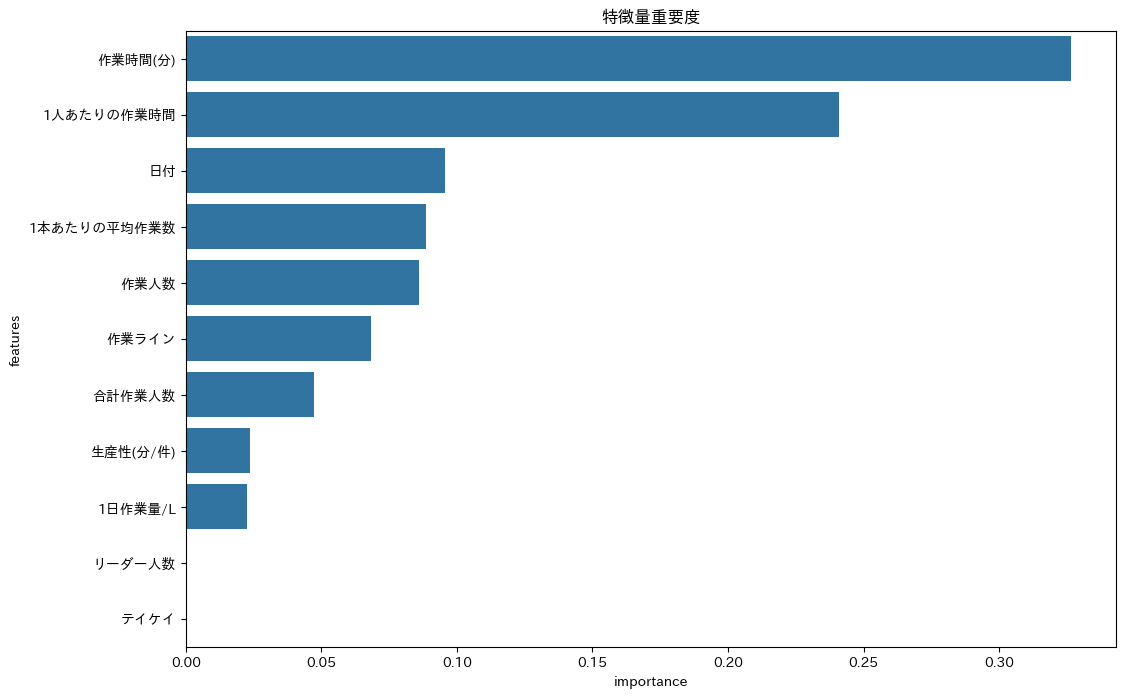

In [217]:
# 特徴量重要度を可視化
%pip install matplotlib seaborn japanize-matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import japanize_matplotlib
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='features', data=df)
plt.title('特徴量重要度')
plt.show()

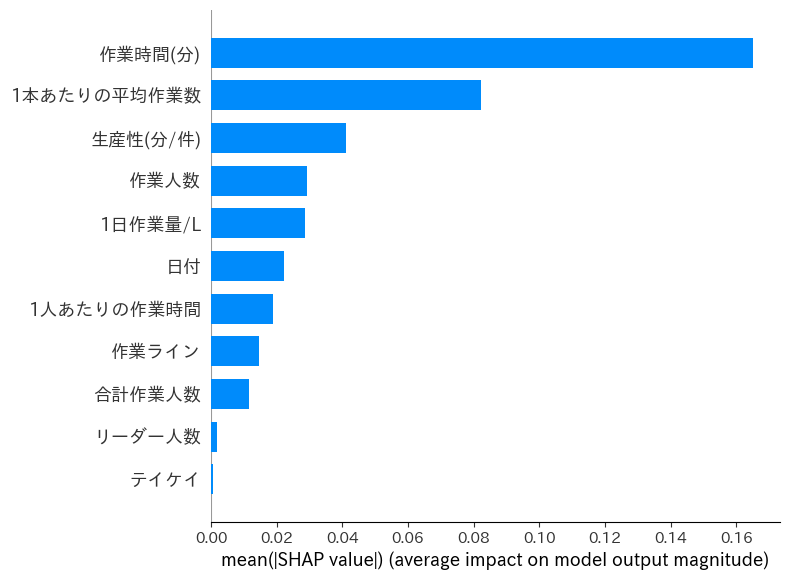

In [218]:
# SHAP値を計算
import shap
shap.initjs()
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# SHAP値を可視化
shap.summary_plot(shap_values, X_test, plot_type='bar')

In [219]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# モデルのインスタンス化
model = GradientBoostingRegressor(random_state=42)

# ランダムサーチのパラメータを設定
param_dist = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10)
}

# ランダムサーチの実行
random_search = RandomizedSearchCV(model, param_dist, n_iter=100, cv=5, scoring='r2', verbose=1, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# 最良のパラメータを出力
print("Best parameters found: ", random_search.best_params_)
print("Best R² score found: ", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'learning_rate': np.float64(0.13135243813665703), 'max_depth': 3, 'n_estimators': 727}
Best R² score found:  0.7918013136656686


In [220]:
# 最良パラメータでモデルを再学習
best_model = random_search.best_estimator_

# テストデータでの予測
y_pred = best_model.predict(X_test)

# 予測結果を元に戻す
y_pred_original = np.exp(y_pred)
y_test_original = np.exp(y_test)

# 各インデックスごとに比較結果を表示
for i in range(len(X_test)):
    print(f'Predicted: {y_pred_original[i]}')
    print(f'Actual: {y_test_original.iloc[i]}')
    print(f'Difference: {y_pred_original[i] - y_test_original.iloc[i]}')
    print('----------')

Predicted: 2020.4557236786297
Actual: 2199.9999999999995
Difference: -179.5442763213698
----------
Predicted: 1049.0898924321036
Actual: 1173.0000000000005
Difference: -123.91010756789683
----------
Predicted: 1536.5159136543355
Actual: 1895.0000000000002
Difference: -358.48408634566476
----------
Predicted: 2917.9145124724555
Actual: 2912.999999999999
Difference: 4.914512472456408
----------
Predicted: 2795.5857667427513
Actual: 2795.0000000000005
Difference: 0.5857667427508204
----------
Predicted: 3187.7174920670936
Actual: 3177.0000000000014
Difference: 10.71749206709228
----------
Predicted: 2710.1198461803724
Actual: 2680.0
Difference: 30.119846180372406
----------
Predicted: 2530.8178499768337
Actual: 2574.000000000001
Difference: -43.182150023167196
----------
Predicted: 1846.0560666962208
Actual: 1740.0000000000005
Difference: 106.05606669622034
----------
Predicted: 2412.349085651573
Actual: 2405.999999999999
Difference: 6.349085651574114
----------
Predicted: 2783.2855721575

In [221]:
# 表にして表示
df = pd.DataFrame({'Predicted': y_pred_original, 'Actual': y_test_original, 'Difference': y_pred_original - y_test_original})
print(df)

               Predicted  Actual  Difference
Unnamed: 3   2020.455724  2200.0 -179.544276
Unnamed: 6   1049.089892  1173.0 -123.910108
Unnamed: 7   1536.515914  1895.0 -358.484086
Unnamed: 8   2917.914512  2913.0    4.914512
Unnamed: 9   2795.585767  2795.0    0.585767
Unnamed: 10  3187.717492  3177.0   10.717492
Unnamed: 12  2710.119846  2680.0   30.119846
Unnamed: 13  2530.817850  2574.0  -43.182150
Unnamed: 14  1846.056067  1740.0  106.056067
Unnamed: 15  2412.349086  2406.0    6.349086
Unnamed: 16  2783.285572  2863.0  -79.714428
Unnamed: 17  2428.707345  2506.0  -77.292655
Unnamed: 19  2317.988421  2404.0  -86.011579
Unnamed: 20  1918.490397  1835.0   83.490397
Unnamed: 21  2002.957354  1976.0   26.957354
Unnamed: 22  2800.373709  2806.0   -5.626291
Unnamed: 23  2345.974679  2447.0 -101.025321
Unnamed: 24  1836.619933  1742.0   94.619933
Unnamed: 25  1417.010438  1333.0   84.010438
Unnamed: 26  2701.403615  2868.0 -166.596385
Unnamed: 27  3502.783023  3623.0 -120.216977
Unnamed: 2

In [222]:
# differenceの絶対値を合計
df['Difference'].abs().sum()
print(df['Difference'].abs().sum())

3413.4500867548804


In [223]:
# differenceの合計
df['Difference'].sum()
print(df['Difference'].sum())

-2078.760355619091


In [224]:
# differenceの標準偏差を取得
df['Difference'].std()
print(df['Difference'].std())

197.46068216411734


In [225]:
# differenceの平均
df['Difference'].mean()
print(df['Difference'].mean())


-83.15041422476365


In [226]:
# 予測結果がプラス・マイナス100件に収まっている数を数える
# プラス・マイナス100件に収まっている数をカウントする変数
within_100_count = 0

# 各インデックスごとに比較結果を表示
for i in range(len(X_test)):
    diff = y_pred_original[i] - y_test_original.iloc[i]
    
    # 差がプラス・マイナス100件に収まっている場合
    if abs(diff) <= 100:
        within_100_count += 1

# 結果を表示
print(f'プラス・マイナス100件に収まっている数: {within_100_count}')

プラス・マイナス100件に収まっている数: 14


In [227]:
# 特徴量重要度を表示
feature_importances = best_model.feature_importances_
features = data_9_10_12.drop(columns='件数', errors='ignore').columns
df = pd.DataFrame({'features': features, 'importance': feature_importances})
df = df.sort_values(by='importance', ascending=False)
df

,features,importance
6,1人あたりの作業時間,0.299530
1,作業時間(分),0.204101
0,日付,0.186376
2,作業人数,0.095018
7,1本あたりの平均作業数,0.083085
5,作業ライン,0.073170
9,生産性(分/件),0.033258
10,1日作業量/L,0.019448
4,合計作業人数,0.005708
8,テイケイ,0.000189



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


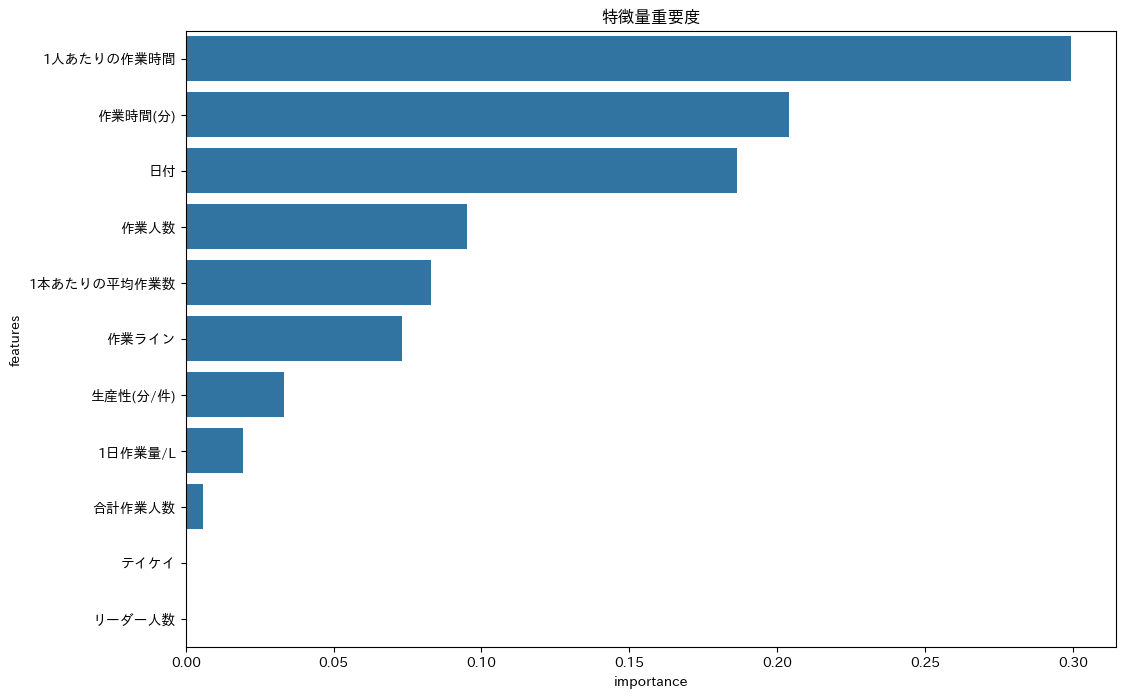

In [228]:
# 特徴量重要度を可視化
%pip install matplotlib seaborn japanize-matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import japanize_matplotlib
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='features', data=df)
plt.title('特徴量重要度')
plt.show()

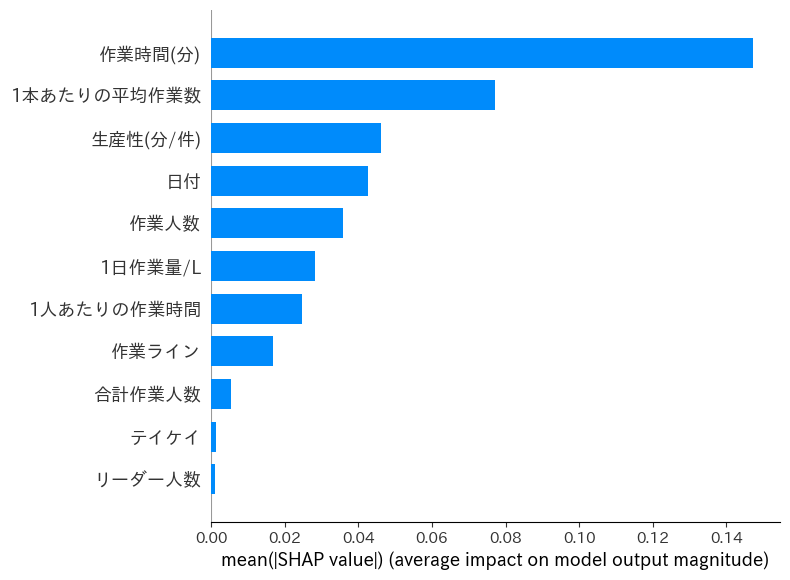

In [229]:
# SHAP値を計算
import shap
shap.initjs()
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# SHAP値を可視化
shap.summary_plot(shap_values, X_test, plot_type='bar')